<h2> <font color="blue"> Solution for </font>Notebook 3</h2>

<h3>Task 1 </h3>

From the information provided above construct the Circuit in Qiskit that executes the above scenario.

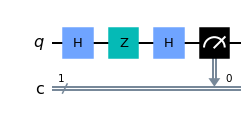

{'1': 1}


In [21]:
from qiskit import *
q = QuantumRegister(1,'q')
c = ClassicalRegister(1,'c')
qc = QuantumCircuit(q,c)

qc.h(q[0]) # Alice applies hadamard

qc.x(q[0]) # bob applies hadamard

qc.h(q[0]) # Alice applies hadamard

qc.measure(q,c)
display(qc.draw(output = 'mpl'))
job = execute(qc,Aer.get_backend('qasm_simulator'),shots = 1)
counts = job.result().get_counts(qc)
print(counts)

<h3>Task 2 </h3>

From the information provided above construct the Circuit in Qiskit that executes the above scenario.

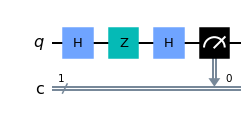

{'1': 1}


In [23]:
from qiskit import *
q = QuantumRegister(1,'q')
c = ClassicalRegister(1,'c')
qc = QuantumCircuit(q,c)

qc.h(q[0]) # Alice applies hadamard

qc.z(q[0]) # bob applies hadamard

qc.h(q[0]) # Alice applies hadamard

qc.measure(q,c)
display(qc.draw(output = 'mpl'))
job = execute(qc,Aer.get_backend('qasm_simulator'),shots = 1)
counts = job.result().get_counts(qc)
print(counts)

<h3>Task 3</h3>

when both the player are playing with the classical stratergy such as  𝐼  or  𝑋 . Then verify that the outcome of the game is same as the outcome of the classical version game.

In [ ]:
%run Game.py
from qiskit import *
from qiskit.quantum_info import Operator
from qiskit.visualization import plot_histogram
import numpy as np

I = np.identity(4)

X = np.matrix([[0,0,0,1],
               [0,0,1,0],
               [0,1,0,0],
               [1,0,0,0]])

O = Operator(1/np.sqrt(2) * (I + 1j * X))
O_dg = Operator(1 / np.sqrt(2) * (I - 1j * X))

q = QuantumRegister(2,'q')
c = ClassicalRegister(2,'c')
qc = QuantumCircuit(q,c)
qc.append(O,[0,1]) # Apply the operator O
qc.barrier()

qc.i(q[0]) # Alice's qbit
qc.i(q[1]) # Bob's qbit
qc.barrier()

qc.append(O_dg,[0,1]) # Apply the operator Odg
qc.barrier()

qc.measure(q,c) # measure the qbits
display(qc.draw(output = 'mpl',reverse_bits = True))
job = execute(qc,Aer.get_backend('qasm_simulator'),shots = 1000)
counts = job.result().get_counts(qc)
print(counts)
    

Game.result(counts)

plot_histogram(counts)

<h3>Task 4</h3>

Find the counter strategy that Bob can use against Alice if she applies $H$ on her qbit. 

Also observe what happens when:
- Alice applies $H$, Bob applies $I$.
- Alice applies $I$, Bob applies $H$.
- if both of them apply $H$ 

In [ ]:
%run Game.py
from qiskit import *
from qiskit.quantum_info import Operator
from qiskit.visualization import plot_histogram
import numpy as np

I = np.identity(4)

X = np.matrix([[0,0,0,1],
               [0,0,1,0],
               [0,1,0,0],
               [1,0,0,0]])

O = Operator(1/np.sqrt(2) * (I + 1j * X))
O_dg = Operator(1 / np.sqrt(2) * (I - 1j * X))

q = QuantumRegister(2,'q')
c = ClassicalRegister(2,'c')
qc = QuantumCircuit(q,c)
qc.append(O,[0,1]) # Apply the operator O
qc.barrier()

qc.h(q[0]) # Alice's qbit
qc.i(q[1]) # Bob's qbit
qc.barrier()

qc.append(O_dg,[0,1]) # Apply the operator Odg
qc.barrier()

qc.measure(q,c) # measure the qbits
display(qc.draw(output = 'mpl',reverse_bits = True))
job = execute(qc,Aer.get_backend('qasm_simulator'),shots = 1000)
counts = job.result().get_counts(qc)
print(counts)
    

Game.result(counts)

plot_histogram(counts)

- From the results we observe that when Alice applies $H$ and Bob applies $Z$ Bob can either win the game or they will cooperate.

- When Alice uses $H$ and bob uses $I$ then Alice wins half of the time and rest of the time they defect.

- When Bob uses $H$ and Alice uses $I$ then Bob wins half of the time and rest of the time they defect.

- When both of them apply $H$ then  the game turn into a fair game where the chances of them winning is $\frac{1}{4}$

<h3>Task 5</h3> 

Lets say that player 1 applies pauli-Z and the player 2 applies pauli-Z and pauli-X. Then apply the following gates observe the results. 

In [ ]:
from qiskit import *
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

qc.append(O,[0,1]) # Apply the operator O
qc.barrier()

qc.x(q[0]) # Alice's qbit
qc.z(q[0])

qc.z(q[1]) # Bob's qbit


qc.barrier()

qc.append(O_dg,[0,1]) # Apply the operator Odg
qc.barrier()

qc.measure(q,c) # measure the qbits
display(qc.draw(output = 'mpl',reverse_bits = True))
job = execute(qc,Aer.get_backend('qasm_simulator'),shots = 1000)
counts = job.result().get_counts(qc)
print(counts)
    

Game.result(counts)

plot_histogram(counts)

The player wins against the player who use $Z$ as a strategy.